# Analysis of Z3 backend over the 109 features set

In this note book we will explore the SMTLib backend with default settings over the F109 feature set by employing decision trees and random forests.

In [1]:
%run f109_info.py

import pandas as pd
import numpy as np

data = pd.read_csv('data/2020-01-23/z3-f109-lto_unique.csv')
n_features = 109

data.head()

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108,Label0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data insights

Firstly, we check how many positive and negative samples exist in the data.

In [2]:
sample_count = len(data)
positive = data[data["Label0"] == 1]
negative = data[data["Label0"] == 0]

print("We have %d samples in the dataset." % sample_count)
print("For %d of these, ProB is able to find a solution (%0.3f%%)" % (len(positive), len(positive)/sample_count))
print("For %d of these, ProB is _not_ able to find a solution (%0.3f%%)" % (len(negative), len(negative)/sample_count))

We have 173449 samples in the dataset.
For 34939 of these, ProB is able to find a solution (0.201%)
For 138510 of these, ProB is _not_ able to find a solution (0.799%)


Text(0, 0.5, '# Samples')

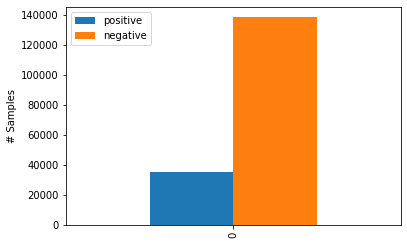

In [3]:
%matplotlib inline

class_balance = pd.DataFrame(data={"positive": [len(positive)], "negative": [len(negative)]})
class_balance_plot = class_balance.plot(kind="bar")
class_balance_plot.set_ylabel("# Samples")

Now we will inspect how often each feature is used in the data in the first place. Thus we can evaluate how much significance each evaluation over the subdomains has.

In [4]:
feature_uses = data[data > 0].count() 
rel_feature_uses = feature_uses/sample_count

fd = {}
for f in range(n_features):
    fd["Feature%d" % f] = [feature_uses[f]]
feature_data = pd.DataFrame(data=fd)
feature_data

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108
0,103929,147805,139707,139707,139707,173340,129386,119759,138507,25731,...,438,1042,882,300,1138,478,491,127,447,54


In [5]:
# We also calculate the relative amount of feature uses.
fd = {}
for f in range(n_features):
    fd["Feature%d" % f] = [rel_feature_uses[f]]
rel_feature_data = pd.DataFrame(data=fd)
rel_feature_data

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108
0,0.599191,0.852153,0.805464,0.805464,0.805464,0.999372,0.74596,0.690457,0.798546,0.148349,...,0.002525,0.006008,0.005085,0.00173,0.006561,0.002756,0.002831,0.000732,0.002577,0.000311


In [6]:
mean_diffs = data.groupby("Label0").mean()
mean_diffs

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108
Label0,,,,,,,,,,,,,,,,,,,,,
0.0,1.911869,2.784347,0.568581,0.390108,0.648908,28.258127,-7.261246,7.973993,0.274942,0.011877,...,0.002235,0.006205,0.004555,0.00054,0.005149,0.001415,0.001661,0.000134,0.002904,0.000279
1.0,1.307148,1.710082,0.645154,0.486616,0.648025,7.880320,-0.178410,0.823271,0.339511,0.014224,...,0.000000,0.000372,0.000000,0.00000,0.004036,0.000000,0.000000,0.000000,0.000406,0.000000


Let us list the sorted differences in mean by feature. The higher the relative value, the more was the feature used in samples Z3 _could not_ find an answer for.

In [9]:
sorted_mean_diffs = ((mean_diffs.iloc[0] / mean_diffs.iloc[1])).sort_values(ascending=False)

for k in sorted_mean_diffs.keys():
    fid = int(k[7:])
    print(f109_name(fid), sorted_mean_diffs[k])

number of iterations per conjunct inf
`reverse` calls ratio per seq op inf
General prod ratio of arithmetic ops inf
Parallel products ratio of rel ops inf
Direct products ratio of rel ops inf
Bijective relations ratio of all relations inf
Surjective relations ratio of all relations inf
Total relations ratio of all relations inf
`concatenation` calls ratio per seq op inf
front insertions ratio per seq op inf
front restrictions ratio per seq op inf
tail restrictions ratio per seq op inf
general concatenations ratio per seq op inf
Bijective, partial function ratio over functions inf
General sum ratio of arithmetic ops 131.0374739545496
Conjunctions per logic ops 40.69985750068064
Relational inversions ratio of rel ops 36.45765372749582
Range restriction ratio of rel ops 34.84384122241885
Rel ops per conjunct 27.956227256540714
Relational images ratio of rel ops 24.23776914263572
Quantified intersections per set set op 22.12641463166857
forward composition ratio of rel ops 20.3269350815963

## Training a Classifier

First, let's check the performance a decision tree or a random forest can reach on a designated train and test set.

### Prepare the training and test data

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2)
train_x = train[train.columns[0:n_features]]
train_y = train["Label0"]

test_x = test[test.columns[0:n_features]]
test_y = test["Label0"]

In [11]:
%run printing.py

<Figure size 432x288 with 0 Axes>

### Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(class_weight="balanced")

tree.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
print_classifier_stats(tree, test_x, test_y)

Test accuracy: 0.906
Test balanced accuracy: 0.851
Test precision: 0.776
Test recall: 0.757
Test F1: 0.766


### Random Forest and Gini Importance

Next we will train a random forest with Gini Impurity and also calculate the respective gini importances of each feature.

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest_0 = RandomForestClassifier(
    n_estimators=100, # 100 Trees.
    criterion="gini", # Using Gini index instead of "entropy"
    n_jobs=6, # Number of CPUs to use.
    bootstrap=False,
    max_features=0.7,
    random_state=124,
    class_weight="balanced")

forest_0.fit(train_x, train_y)


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=0.7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=6,
                       oob_score=False, random_state=124, verbose=0,
                       warm_start=False)

In [15]:
print_classifier_stats(forest_0, test_x, test_y)


Test accuracy: 0.919
Test balanced accuracy: 0.873
Test precision: 0.799
Test recall: 0.795
Test F1: 0.797


## Training on the full data set

For the feature evaluation it might be more of interest to not exclude the test set from the training data. We do not aim for a good predictor but instead for an analysis over the whole dataset.

In [16]:
X = data[data.columns[0:n_features]]
Y = data["Label0"]

forest = RandomForestClassifier(
    n_estimators=50, # 50 Trees.
    criterion="gini", # Using Gini index instead of "entropy"
    n_jobs=6, # Number of CPUs to use.
    bootstrap=False,
    max_features=0.7,
    random_state=123,
    class_weight="balanced")

forest.fit(X, Y)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=0.7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=6,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [17]:
print_classifier_stats(forest, X, Y)

Test accuracy: 0.975
Test balanced accuracy: 0.945
Test precision: 1.000
Test recall: 0.889
Test F1: 0.941


List features by importance

In [18]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [19]:
# Print the feature ranking
print("Feature ranking:")

cat_count_top50 = {}
cat_count_top100 = {}
for f in range(100):
    cat = f109_category(indices[f])
    cat_count_top100[cat] = cat_count_top100.get(cat, 0) + 1
    if f < 50:
        cat_count_top50[cat] = cat_count_top50.get(cat, 0) + 1
    print("%3d. feature %3d (importance: %1.6f, rel. usage: %1.6f):  [%-11s]  %s" % (f + 1, indices[f], importances[indices[f]], rel_feature_uses[indices[f]], cat, f109_name(indices[f])))

Feature ranking:
  1. feature  60 (importance: 0.238579, rel. usage: 0.574071):  [Relations  ]  Rel ops per conjunct
  2. feature  70 (importance: 0.079556, rel. usage: 0.402977):  [Relations  ]  Relational domain ratio of rel ops
  3. feature  79 (importance: 0.063304, rel. usage: 0.667972):  [Functions  ]  Functions per conjunct
  4. feature  23 (importance: 0.034756, rel. usage: 0.466166):  [Identifiers]  Function var ratio of identifiers
  5. feature  58 (importance: 0.028537, rel. usage: 0.431833):  [Relations  ]  avg. power set nesting depth
  6. feature  75 (importance: 0.025374, rel. usage: 0.130863):  [Relations  ]  Domain restriction ratio of rel ops
  7. feature  30 (importance: 0.025138, rel. usage: 0.974240):  [Arithmetic ]  #ids with unbounded domains ratio of all identifers, explicit
  8. feature  18 (importance: 0.023153, rel. usage: 0.999619):  [Identifiers]  Number of identifiers per conjunct
  9. feature   1 (importance: 0.022135, rel. usage: 0.852153):  [Logic      

How many of the features of each category made it to the top 100?

In [20]:
cat_count_total = {}
for f in range(n_features):
    cat = f109_category(f)
    cat_count_total[cat] = cat_count_total.get(cat, 0) + 1

### Category count in Top 100

In [21]:
for cat, count in cat_count_total.items():
    top100 = cat_count_top100.get(cat, 0)
    print("%-11s: %2d/%2d, %.3f%%" % (cat, top100, count, top100/count))

Logic      : 11/11, 1.000%
Quantifiers:  4/ 4, 1.000%
Equality   :  2/ 2, 1.000%
Identifiers: 13/13, 1.000%
Arithmetic : 10/10, 1.000%
Set theory : 17/18, 0.944%
Relations  : 16/20, 0.800%
Functions  : 10/11, 0.909%
Sequences  : 15/17, 0.882%
Closure    :  2/ 3, 0.667%


### Category count in Top 50

In [22]:
for cat, count in cat_count_total.items():
    top50 = cat_count_top50.get(cat, 0)
    print("%-11s: %2d/%2d, %.3f%%" % (cat, top50, count, top50/count))

Logic      : 11/11, 1.000%
Quantifiers:  2/ 4, 0.500%
Equality   :  2/ 2, 1.000%
Identifiers: 11/13, 0.846%
Arithmetic :  5/10, 0.500%
Set theory :  8/18, 0.444%
Relations  :  4/20, 0.200%
Functions  :  5/11, 0.455%
Sequences  :  2/17, 0.118%
Closure    :  0/ 3, 0.000%


### Category counts Top 50 vs. Top 100

In [23]:
print("------------ %-5s %-5s Decline" % ("T100", "T50"))
for cat, count in cat_count_total.items():
    top50 = cat_count_top50.get(cat, 0)
    top100 = cat_count_top100.get(cat, 0)
    print("%-11s: %.3f %.3f %.3f" % (cat, top100/count, top50/count, ((top100-top50)/top100) if top100>0 else 0))


------------ T100  T50   Decline
Logic      : 1.000 1.000 0.000
Quantifiers: 1.000 0.500 0.500
Equality   : 1.000 1.000 0.000
Identifiers: 1.000 0.846 0.154
Arithmetic : 1.000 0.500 0.500
Set theory : 0.944 0.444 0.529
Relations  : 0.800 0.200 0.750
Functions  : 0.909 0.455 0.500
Sequences  : 0.882 0.118 0.867
Closure    : 0.667 0.000 1.000


## Taking a look at permutation importance

While the Gini index captures the average gain of splitting on each feature in their respective position in the tree, the permutation importance is more robust against variable codependencies.

In [24]:
from sklearn.inspection import permutation_importance

perm_importances = permutation_importance(forest, X, Y, scoring='balanced_accuracy', n_repeats=5, n_jobs=1, random_state=1234)
perm_indices = perm_importances.importances_mean.argsort()[::-1]

In [25]:
# Print the feature ranking
print("Feature ranking:")

pcat_count_top50 = {}
pcat_count_top100 = {}
for f in range(100):
    cat = f109_category(perm_indices[f])
    pcat_count_top100[cat] = pcat_count_top100.get(cat, 0) + 1
    if f < 50:
        pcat_count_top50[cat] = pcat_count_top50.get(cat, 0) + 1
    print("%3d. feature %3d (importance: %1.6f, rel. usage: %1.6f):  [%-11s]  %s" % (f + 1, perm_indices[f], perm_importances.importances_mean[perm_indices[f]], rel_feature_uses[perm_indices[f]], cat, f109_name(perm_indices[f])))

Feature ranking:
  1. feature  60 (importance: 0.262736, rel. usage: 0.574071):  [Relations  ]  Rel ops per conjunct
  2. feature  79 (importance: 0.223804, rel. usage: 0.667972):  [Functions  ]  Functions per conjunct
  3. feature  58 (importance: 0.063145, rel. usage: 0.431833):  [Relations  ]  avg. power set nesting depth
  4. feature  21 (importance: 0.054657, rel. usage: 0.640240):  [Identifiers]  Set var ratio of identifiers
  5. feature  23 (importance: 0.047833, rel. usage: 0.466166):  [Identifiers]  Function var ratio of identifiers
  6. feature  30 (importance: 0.047668, rel. usage: 0.974240):  [Arithmetic ]  #ids with unbounded domains ratio of all identifers, explicit
  7. feature  55 (importance: 0.044009, rel. usage: 0.431833):  [Set theory ]  Powersets per conjunct
  8. feature  18 (importance: 0.035550, rel. usage: 0.999619):  [Identifiers]  Number of identifiers per conjunct
  9. feature  31 (importance: 0.029113, rel. usage: 0.601618):  [Arithmetic ]  Arithmetic ops p

In [26]:
print("------------ %-5s %-5s Decline" % ("T100", "T50"))
for cat, count in cat_count_total.items():
    top50 = pcat_count_top50.get(cat, 0)
    top100 = pcat_count_top100.get(cat, 0)
    print("%-11s: %.3f %.3f %.3f" % (cat, top100/count, top50/count, ((top100-top50)/top100) if top100>0 else 0))


------------ T100  T50   Decline
Logic      : 1.000 0.909 0.091
Quantifiers: 1.000 0.500 0.500
Equality   : 1.000 1.000 0.000
Identifiers: 1.000 0.769 0.231
Arithmetic : 1.000 0.500 0.500
Set theory : 0.944 0.500 0.471
Relations  : 0.700 0.250 0.643
Functions  : 0.909 0.455 0.500
Sequences  : 0.941 0.118 0.875
Closure    : 1.000 0.000 1.000


## Top 50/100 comparison between Gini Importance and Permutation Importance

In [27]:
print(".             Gini         Permutation")
print(".             %-5s %-5s  %-5s %-5s" % ("T100", "T50", "T100", "T50"))
for cat, count in cat_count_total.items():
    top50 = cat_count_top50.get(cat, 0)
    top100 = cat_count_top100.get(cat, 0)
    ptop50 = pcat_count_top50.get(cat, 0)
    ptop100 = pcat_count_top100.get(cat, 0)
    print("%-11s:  %.3f %.3f  %.3f %.3f" % (cat, top100/count, top50/count, ptop100/count, ptop50/count))


.             Gini         Permutation
.             T100  T50    T100  T50  
Logic      :  1.000 1.000  1.000 0.909
Quantifiers:  1.000 0.500  1.000 0.500
Equality   :  1.000 1.000  1.000 1.000
Identifiers:  1.000 0.846  1.000 0.769
Arithmetic :  1.000 0.500  1.000 0.500
Set theory :  0.944 0.444  0.944 0.500
Relations  :  0.800 0.200  0.700 0.250
Functions  :  0.909 0.455  0.909 0.455
Sequences  :  0.882 0.118  0.941 0.118
Closure    :  0.667 0.000  1.000 0.000


## Taking a look at the individual decision trees

In [28]:
%run feature_stats.py

def calc_feature_stats(feature_ids):
    """Returns a dictionary over the given feature ids as keys.
    For each feature, another dictionary with the following structure is returned:
        {'rank-gini': rank_gini_importance, 'rank-permutation': rank_permutation_importance,
         'tendency': tendency,
         'thresholds': {'list': thresholds,
                        'avg': avg_threshold,
                        'median': median_threshold},
         'num_lower_below_threshold': num_left_lower,
         'num_lower_above_threshold': num_right_lower}
    The entry might be an empty dictionary if the corresponding feature was not used.
    """
    stats = {}
    for fid in feature_ids:
        rank_gini = np.argwhere(indices == fid)[0][0]+1
        rank_perm = np.argwhere(perm_indices == fid)[0][0]+1
        thresholds = []
        num_left_lower = 0
        num_right_lower = 0
        for tinfo in ftree_infos:
            split_info = tinfo['splits'][fid]
            if split_info == {}: continue # Feature not used in this tree.
            thresholds.append(split_info['threshold'])
            if split_info['unknown_rate'] > split_info['unknown_rate_left']:
                num_left_lower += 1
            else:
                num_right_lower += 1
        thresholds.sort()
        if (len(thresholds) == 0):
            stats[fid] = {}
            continue
        avg_threshold = sum(thresholds)/len(ftree_infos)
        med_threshold = thresholds[len(thresholds)//2]
        tendency = num_right_lower - num_left_lower
        stats[fid] = {'rank-gini': rank_gini, 'rank-permutation': rank_perm,
                      'tendency': tendency, 'thresholds': {'list': thresholds, 'avg': avg_threshold, 'median': med_threshold},
                      'num_lower_below_threshold': num_left_lower, 'num_lower_above_threshold': num_right_lower}
    return stats


def print_feature_stats(feature_stats):
    for fid in sorted(feature_stats.keys()):
        stats = feature_stats.get(fid)
        if stats == {}:
            print(f109_name(fid))
            print("  feature is not used.")
            continue
        print(f109_name(fid))
        print("  - Gini rank no.", stats['rank-gini'], "  Perm. rank no.", stats['rank-permutation'], "-")
        print("  avg threshold: %.3f (min %.3f, max %.3f, median %.3f)" % (stats['thresholds']['avg'], stats['thresholds']['list'][0], stats['thresholds']['list'][-1], stats['thresholds']['median']))
        tendency = stats['tendency']
        num_left_lower = stats['num_lower_below_threshold']
        num_right_lower = stats['num_lower_above_threshold']
        print("  %.2f%% of trees observe higher solvability if below threshold, %.2f%% above" % (100*num_left_lower/len(ftree_infos), 100*num_right_lower/len(ftree_infos)))
        print("  tendency of %s values for more solvable constraints (tendency value: %d)" % ("higher" if tendency > 0 else "lower", tendency))


def print_feature_group_stats(features, category_name):
    print("#", category_name)
    fs = calc_feature_stats(features)
    tendencies = [fs[s]['tendency'] for s in fs.keys() if fs[s] != {}]
    print("  Average tendency:", sum(tendencies)/len(tendencies))
    print_feature_stats(fs)



In [29]:
forest_trees = forest.estimators_

ftree_infos = []

for tree in forest_trees:
    ftree_infos.append(gather_tree_info(tree))

For the top 50 features, what are the thresholds and where do they lead?
The tendency values range from -50 to 50 (including) and show how many trees in the forest lead to an answer if the value is below (-50) or above (+50) their respective threshold.

In [30]:
for fid in indices[0:50]:
    print("->", f109_name(fid))
    thresholds = []
    num_left_lower = 0
    num_right_lower = 0
    for tinfo in ftree_infos:
        split_info = tinfo['splits'][fid]
        if split_info == {}: continue # Feature not used in this tree.
        thresholds.append(split_info['threshold'])
        if split_info['unknown_rate'] > split_info['unknown_rate_left']:
            num_left_lower += 1
        else:
            num_right_lower += 1
    thresholds.sort()
    avg_threshold = sum(thresholds)/len(ftree_infos)
    med_threshold = thresholds[len(ftree_infos)//2]
    print("  avg threshold: %.3f (min %.3f, max %.3f, median %.3f)" % (avg_threshold, thresholds[0], thresholds[-1], med_threshold))
    print("  %.2f%% of trees observe higher solvability if below threshold, %.2f%% above" % (100*num_left_lower/len(ftree_infos), 100*num_right_lower/len(ftree_infos)))
    tendency = num_right_lower - num_left_lower
    print("  tendency of %s values for more solvable constraints (tendency value: %d)" % ("higher" if tendency > 0 else "lower", tendency))


-> Rel ops per conjunct
  avg threshold: 0.010 (min 0.002, max 0.333, median 0.002)
  100.00% of trees observe higher solvability if below threshold, 0.00% above
  tendency of lower values for more solvable constraints (tendency value: -50)
-> Relational domain ratio of rel ops
  avg threshold: 0.386 (min 0.010, max 1.000, median 0.500)
  52.00% of trees observe higher solvability if below threshold, 48.00% above
  tendency of lower values for more solvable constraints (tendency value: -2)
-> Functions per conjunct
  avg threshold: 0.075 (min 0.002, max 0.229, median 0.017)
  100.00% of trees observe higher solvability if below threshold, 0.00% above
  tendency of lower values for more solvable constraints (tendency value: -50)
-> Function var ratio of identifiers
  avg threshold: 0.107 (min 0.004, max 0.500, median 0.148)
  78.00% of trees observe higher solvability if below threshold, 22.00% above
  tendency of lower values for more solvable constraints (tendency value: -28)
-> avg. 

We see that certain features, while having high relevancy for classification, display a tendency around 0. 
But what does that mean regarding their relevancy? Naively it look as the feature is not a language-subset in which the backend performs worse but rather that unknown-results are related to the rest of the predicate. Depending on the random data subset the respective tree was trained on, the threshold might split into better or worse samples.

### Display of tendencies per category

In [31]:
print_feature_group_stats(range(12), "Logic")

# Logic
  Average tendency: -0.8333333333333334
Number of conjuncts (log2)
  - Gini rank no. 40   Perm. rank no. 40 -
  avg threshold: 2.451 (min 0.500, max 6.313, median 1.792)
  46.00% of trees observe higher solvability if below threshold, 54.00% above
  tendency of higher values for more solvable constraints (tendency value: 4)
Max conjunct depth per conjunct
  - Gini rank no. 9   Perm. rank no. 16 -
  avg threshold: 2.072 (min 0.500, max 6.731, median 1.583)
  64.00% of trees observe higher solvability if below threshold, 36.00% above
  tendency of lower values for more solvable constraints (tendency value: -14)
number of negations per conjunct
  - Gini rank no. 28   Perm. rank no. 33 -
  avg threshold: 1.417 (min 0.031, max 5.500, median 0.500)
  50.00% of trees observe higher solvability if below threshold, 50.00% above
  tendency of lower values for more solvable constraints (tendency value: 0)
max negation depth per conjunct
  - Gini rank no. 45   Perm. rank no. 53 -
  avg thr

In [32]:
print_feature_group_stats(range(12, 16), "Quantifiers") 

# Quantifiers
  Average tendency: -31.5
Quantifiers per conjunct
  - Gini rank no. 11   Perm. rank no. 14 -
  avg threshold: 3.689 (min 0.077, max 4.500, median 4.500)
  98.00% of trees observe higher solvability if below threshold, 2.00% above
  tendency of lower values for more solvable constraints (tendency value: -48)
\forall ratio of all quantifiers
  - Gini rank no. 62   Perm. rank no. 72 -
  avg threshold: 0.695 (min 0.250, max 1.000, median 0.500)
  92.00% of trees observe higher solvability if below threshold, 8.00% above
  tendency of lower values for more solvable constraints (tendency value: -42)
\exists ratio of all quantifiers
  - Gini rank no. 16   Perm. rank no. 41 -
  avg threshold: 0.702 (min 0.250, max 1.000, median 0.500)
  80.00% of trees observe higher solvability if below threshold, 20.00% above
  tendency of lower values for more solvable constraints (tendency value: -30)
average nesting depth of quantifiers
  - Gini rank no. 31   Perm. rank no. 45 -
  avg thres

In [33]:
print_feature_group_stats(range(16, 18), "Equality") 

# Equality
  Average tendency: 21.0
Equality per conjunct
  - Gini rank no. 19   Perm. rank no. 18 -
  avg threshold: 0.503 (min 0.167, max 0.946, median 0.500)
  0.00% of trees observe higher solvability if below threshold, 100.00% above
  tendency of higher values for more solvable constraints (tendency value: 50)
Inequality per conjunct
  - Gini rank no. 13   Perm. rank no. 12 -
  avg threshold: 0.690 (min 0.137, max 6.500, median 0.500)
  58.00% of trees observe higher solvability if below threshold, 42.00% above
  tendency of lower values for more solvable constraints (tendency value: -8)


In [34]:
print_feature_group_stats(range(18, 31), "Identifiers") 

# Identifiers
  Average tendency: 0.9230769230769231
Number of identifiers per conjunct
  - Gini rank no. 8   Perm. rank no. 8 -
  avg threshold: 6.166 (min 0.017, max 48.500, median 0.538)
  42.00% of trees observe higher solvability if below threshold, 58.00% above
  tendency of higher values for more solvable constraints (tendency value: 8)
Integer var ratio of identifiers
  - Gini rank no. 27   Perm. rank no. 28 -
  avg threshold: 0.555 (min 0.054, max 1.000, median 0.592)
  12.00% of trees observe higher solvability if below threshold, 88.00% above
  tendency of higher values for more solvable constraints (tendency value: 38)
Boolean var ratio of identifiers
  - Gini rank no. 53   Perm. rank no. 69 -
  avg threshold: 0.326 (min 0.018, max 0.937, median 0.181)
  24.00% of trees observe higher solvability if below threshold, 76.00% above
  tendency of higher values for more solvable constraints (tendency value: 26)
Set var ratio of identifiers
  - Gini rank no. 14   Perm. rank no. 4

In [35]:
print_feature_group_stats(range(31, 41), "Arithmetic") 

# Arithmetic
  Average tendency: -12.0
Arithmetic ops per conjunct
  - Gini rank no. 15   Perm. rank no. 9 -
  avg threshold: 1.789 (min 0.125, max 20.500, median 0.500)
  22.00% of trees observe higher solvability if below threshold, 78.00% above
  tendency of higher values for more solvable constraints (tendency value: 28)
Addition ratio of arithmetic ops
  - Gini rank no. 38   Perm. rank no. 42 -
  avg threshold: 0.728 (min 0.167, max 1.000, median 0.875)
  56.00% of trees observe higher solvability if below threshold, 44.00% above
  tendency of lower values for more solvable constraints (tendency value: -6)
Multiplication ratio of arithmetic ops
  - Gini rank no. 37   Perm. rank no. 23 -
  avg threshold: 0.361 (min 0.038, max 1.000, median 0.377)
  96.00% of trees observe higher solvability if below threshold, 4.00% above
  tendency of lower values for more solvable constraints (tendency value: -46)
Division ratio of arithmetic ops
  - Gini rank no. 65   Perm. rank no. 64 -
  avg t

In [36]:
print_feature_group_stats(range(41, 59), "Set theory") 

# Set theory
  Average tendency: -10.176470588235293
Set inclusions per conjunct
  - Gini rank no. 12   Perm. rank no. 10 -
  avg threshold: 0.461 (min 0.032, max 1.500, median 0.421)
  10.00% of trees observe higher solvability if below threshold, 90.00% above
  tendency of higher values for more solvable constraints (tendency value: 40)
Set operations per conjunct
  - Gini rank no. 46   Perm. rank no. 11 -
  avg threshold: 1.118 (min 0.016, max 12.000, median 0.500)
  84.00% of trees observe higher solvability if below threshold, 16.00% above
  tendency of lower values for more solvable constraints (tendency value: -34)
Set comprehensions per conjunct
  - Gini rank no. 44   Perm. rank no. 21 -
  avg threshold: 0.028 (min 0.006, max 0.250, median 0.012)
  30.00% of trees observe higher solvability if below threshold, 70.00% above
  tendency of higher values for more solvable constraints (tendency value: 20)
Set memberships ratio of set inclusion ops
  - Gini rank no. 30   Perm. rank n

In [37]:
print_feature_group_stats(range(59, 79), "Relations") 

# Relations
  Average tendency: 0.47058823529411764
Relations per conjunct
  - Gini rank no. 54   Perm. rank no. 51 -
  avg threshold: 0.524 (min 0.200, max 1.875, median 0.417)
  66.00% of trees observe higher solvability if below threshold, 34.00% above
  tendency of lower values for more solvable constraints (tendency value: -16)
Rel ops per conjunct
  - Gini rank no. 1   Perm. rank no. 1 -
  avg threshold: 0.010 (min 0.002, max 0.333, median 0.002)
  100.00% of trees observe higher solvability if below threshold, 0.00% above
  tendency of lower values for more solvable constraints (tendency value: -50)
General relations ratio of all relations
  - Gini rank no. 58   Perm. rank no. 54 -
  avg threshold: 0.530 (min 0.500, max 1.000, median 0.500)
  60.00% of trees observe higher solvability if below threshold, 40.00% above
  tendency of lower values for more solvable constraints (tendency value: -10)
Total relations ratio of all relations
  feature is not used.
Surjective relations ra

In [38]:
print_feature_group_stats(range(79, 90), "Functions") 

# Functions
  Average tendency: -10.4
Functions per conjunct
  - Gini rank no. 3   Perm. rank no. 2 -
  avg threshold: 0.075 (min 0.002, max 0.229, median 0.017)
  100.00% of trees observe higher solvability if below threshold, 0.00% above
  tendency of lower values for more solvable constraints (tendency value: -50)
Function applications per conjunct
  - Gini rank no. 10   Perm. rank no. 19 -
  avg threshold: 0.699 (min 0.003, max 4.000, median 0.500)
  42.00% of trees observe higher solvability if below threshold, 58.00% above
  tendency of higher values for more solvable constraints (tendency value: 8)
General, partial function ratio over functions
  - Gini rank no. 20   Perm. rank no. 20 -
  avg threshold: 0.609 (min 0.036, max 1.000, median 0.500)
  54.00% of trees observe higher solvability if below threshold, 46.00% above
  tendency of lower values for more solvable constraints (tendency value: -4)
General, total function ratio over functions
  - Gini rank no. 23   Perm. rank no

In [39]:
print_feature_group_stats(range(90, 107), "Sequences") 

# Sequences
  Average tendency: -28.6
Total amount of sequences per conjunct
  - Gini rank no. 34   Perm. rank no. 30 -
  avg threshold: 0.565 (min 0.022, max 2.500, median 0.500)
  98.00% of trees observe higher solvability if below threshold, 2.00% above
  tendency of lower values for more solvable constraints (tendency value: -48)
Seq ops per conjunct
  - Gini rank no. 52   Perm. rank no. 38 -
  avg threshold: 0.425 (min 0.250, max 1.500, median 0.250)
  100.00% of trees observe higher solvability if below threshold, 0.00% above
  tendency of lower values for more solvable constraints (tendency value: -50)
Normal sequence ratio of all sequences
  - Gini rank no. 49   Perm. rank no. 55 -
  avg threshold: 0.560 (min 0.500, max 1.000, median 0.500)
  86.00% of trees observe higher solvability if below threshold, 14.00% above
  tendency of lower values for more solvable constraints (tendency value: -36)
Injective sequence ratio of all sequences
  feature is not used.
`size` calls ratio 

In [40]:
print_feature_group_stats(range(107, 109), "Closure and Iterate")

# Closure and Iterate
  Average tendency: -28.0
number of closures per conjunct
  - Gini rank no. 76   Perm. rank no. 67 -
  avg threshold: 0.213 (min 0.045, max 0.833, median 0.071)
  96.00% of trees observe higher solvability if below threshold, 4.00% above
  tendency of lower values for more solvable constraints (tendency value: -46)
number of iterations per conjunct
  - Gini rank no. 99   Perm. rank no. 89 -
  avg threshold: 0.150 (min 0.500, max 1.000, median 1.000)
  20.00% of trees observe higher solvability if below threshold, 0.00% above
  tendency of lower values for more solvable constraints (tendency value: -10)


### Gather information over the learned rules with inTrees

In [0]:
%run intrees.py

In [0]:
extracted_rules = extract_rules(forest)

How many rules did we collect?

In [0]:
rule_count = 0
for tree in forest.estimators_:
    rule_set = extracted_rules[tree]
    rule_count += len(rule_set)
rule_count

How many conditions can we collect?

In [0]:
extracted_conds = extract_conditions(forest, max_depth=15)

In [0]:
cond_count = 0
for tree in forest.estimators_:
    conds = extracted_conds[tree]
    cond_count += len(conds)
cond_count

In [0]:
avg_rule_length = 0
avg_rule_error = 0
avg_rule_freq = 0

annotated_rules = [] # Tuples (rule, frequency, error, length, tree)

for tree in forest.estimators_:
    rule_set = extracted_rules[tree]
    for rule in rule_set:
        rl = rule_length(tree, rule)
        re = rule_error(tree, rule)
        rf = rule_frequency(tree, rule)
        avg_rule_length += rl
        avg_rule_error += re
        avg_rule_freq += rf
        annotated_rules += [(rule, rf, re, rl, tree)]

avg_rule_error /= rule_count
avg_rule_length /= rule_count
avg_rule_freq /= rule_count

print("Avg frequency:", avg_rule_freq)
print("Avg error:", avg_rule_error)
print("Avg length:", avg_rule_length)

In [0]:
def pretty_print_rule(rule):
    cond, target = rule
    for (_, fid, thresh, leq) in cond:
        comp_sign = "<=" if leq else ">"
        print("# %3d: %s %s %.3f" % (fid, f109_name(fid), comp_sign, thresh))
    print("=> %d" % target)

In [0]:
# Top 10 rules sorted by frequency, length, and error
for ranked_rule in sorted(annotated_rules, key = lambda r: (1/r[1], 1/r[3], r[2]))[0:10]:
    pretty_print_rule(ranked_rule[0])
    print("Freq.: %f, error: %f, length: %d" % (ranked_rule[1], ranked_rule[2], ranked_rule[3]))
    print()

In [0]:
# Prints the first five rules for unkown
count = 0
for ranked_rule in sorted(annotated_rules, key = lambda r: (1/r[1], 1/r[3], r[2])):
    rule = ranked_rule[0]
    if rule[1] == 0:
        pretty_print_rule(rule)
        print()
        count += 1
    if count >= 5: break
        

Further, we will investigate only the rules which concern themselves with negative outcomes.

In [0]:
neg_rules = []
for tree in extracted_rules:
    neg_rules += [(c, o) for (c, o) in extracted_rules[tree] if o == 0]
len(neg_rules)

In [0]:
# This calculates the support and confidence of each rule **restricted onto the longest 5000 rules***
max_depth = 10 # Only considering first 10 items in each rule
sneg_rules = sorted(neg_rules, key=lambda x: 1/len(x[0]))
annotated_neg_rules = analyse_rule_set(sneg_rules[:5000], max_depth=max_depth)

In [0]:
def pretty_print_assoc_rule(rule):
    (cond, target) = rule
    for c in sorted(cond, key=lambda x: 1/perm_importances.importances_mean[x[0]]):
        fid, leq = c
        print(f109_name(fid), "(low)" if leq else "(**high**)", "perm. imp.: %.2f" % perm_importances.importances_mean[fid])
    print("=>", target)

In [0]:
ar_c, ar_o, _, _ = sorted(annotated_neg_rules, key=lambda r: 1/(r[2]+1))[0]
pretty_print_assoc_rule((ar_c, ar_o))

In [0]:
seen = set([])
for (cond, out, supp, conf) in sorted(annotated_neg_rules, key=lambda r: 1/(r[2]+1)):
    if not frozenset(cond) in seen:
        seen.add(frozenset(cond))
        pretty_print_assoc_rule((cond, out))
        print('Support: %.2f%%, Confidence: %.2f' % (supp*100, conf))
        print()